Esse _notebook_ pode ser utilizado para realizar o treinamento de um modelo, o loop de treinamento e teste é realizado com os códigos `train.py` e `trainLib.py` que foram criados pelo Pr. Dr. Cesar Comin, no repositório da disciplina de Visão Computacional no semestre 2024/1. O repositório pode ser encontrado em https://github.com/chcomin/curso-visao-computacional-2024

Para realizar o treinamento é necessário apenas criar o modelo através da função no terceiro bloco de código e setar os hiperparâmetros no bloco seguinte. Nesse _notebook_ e nos códigos de treinamento, há algumas linhas comentadas que podem ser utilizadas para o monitoramento através da biblioteca `tensorboard`.

In [9]:
import torchseg
from torch import nn
import train
import os

In [10]:
# 'gambiarra' garantindo que o download do modelo seja feito em um path específico
os.environ['TORCH_HOME'] = './models'

In [11]:
model = torchseg.Unet(
    encoder_name="densenet121",
    in_channels=3,
    classes=2,
    encoder_weights=True
)

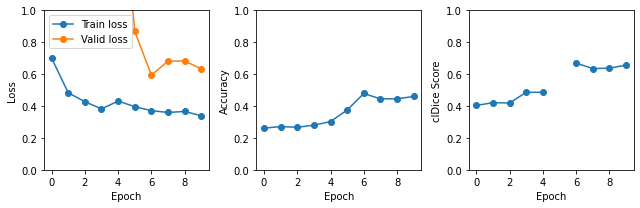

In [12]:
params = {
    'bs_train':4,
    'bs_valid':4,
    'num_epochs':10,
    'lr':0.1,
    'weight_decay':1e-6,
    'resize_size':256,  
    'seed':0,
    'model_name':'Unet - densenet121'
}

ds_train, ds_valid, logger = train.train(model, **params)

#tensorboard
#train.writer.close()

In [13]:
for epch in logger:
    print(f'epoch: {epch[0]+1} || Loss train {epch[1]} || Loss Valid {epch[2]} || Acc {epch[3]} || clDice {epch[4]}')

epoch: 1 || Loss train 0.7011704444885254 || Loss Valid 5.550727844238281 || Acc 0.26113128662109375 || clDice 0.4039375893391671
epoch: 2 || Loss train 0.48332637548446655 || Loss Valid 4.104680061340332 || Acc 0.27125978469848633 || clDice 0.42104723366296265
epoch: 3 || Loss train 0.427660197019577 || Loss Valid 5.94058084487915 || Acc 0.2668582499027252 || clDice 0.41927665607462894
epoch: 4 || Loss train 0.38215383887290955 || Loss Valid 4.317392826080322 || Acc 0.27983999252319336 || clDice 0.4864815703579817
epoch: 5 || Loss train 0.43113911151885986 || Loss Valid 1.9808216094970703 || Acc 0.30258074402809143 || clDice 0.4861032641547521
epoch: 6 || Loss train 0.39627426862716675 || Loss Valid 0.8684322237968445 || Acc 0.3751559853553772 || clDice nan
epoch: 7 || Loss train 0.3711512088775635 || Loss Valid 0.5937390327453613 || Acc 0.47873759269714355 || clDice 0.6690530387082858
epoch: 8 || Loss train 0.3596991300582886 || Loss Valid 0.6819860339164734 || Acc 0.4451452791690826

In [14]:
acc_list = []
for line in logger:
    acc_list.append(line[3])

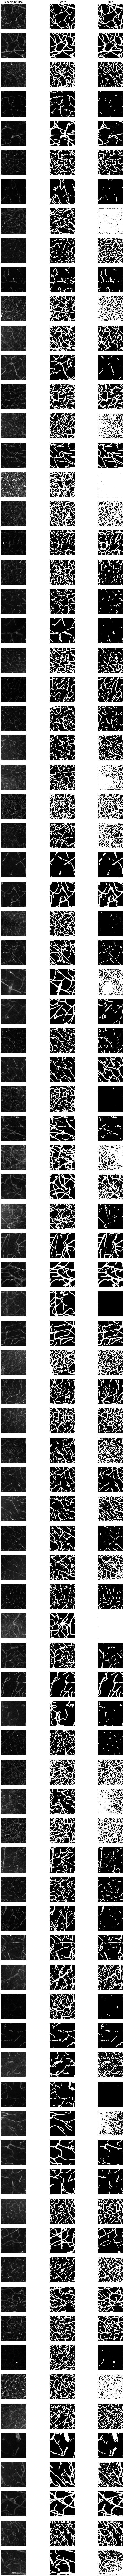

In [16]:
import matplotlib.pyplot as plt
import torch
import dataset

model.eval()
fig, axs = plt.subplots(len(ds_valid), 3, figsize=(16,256))

axs[0, 0].set_title('Imagem Original', fontsize=16)
axs[0, 1].set_title('Target', fontsize=16)
axs[0, 2].set_title('Pred', fontsize=16)

for idx in range(len(ds_valid)):
    img, target = ds_valid[idx]
    with torch.no_grad():
        scores = model(img.unsqueeze(0))#['out']
    pred = torch.argmax(scores, dim=1)[0]
    axs[idx,0].imshow(img[0], 'gray')
    axs[idx,0].axis('off')
    axs[idx,1].imshow(target, 'gray')
    axs[idx,1].axis('off')
    axs[idx,2].imshow(pred, 'gray')
    axs[idx,2].axis('off')
    #axs[idx,2].set_xlabel(str(accs[idx].item), fontsize=12, color='black')

plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.95)
plt.show()

In [17]:
model.eval()
accs = dict()

for idx in range(len(ds_valid)):
    img, target = ds_valid[idx]
    with torch.no_grad():
        scores = model(img.unsqueeze(0))
    pred = torch.argmax(scores, dim=1)[0]
    acc = train.iou(scores, target)
    accs[idx] = acc

In [18]:
acc_ord = dict(sorted(accs.items(), key=lambda item: item[1], reverse=False))
lowest_acc = list(acc_ord.keys())[:5]
highest_acc = list(acc_ord.keys())[-5:]
acc_ord

{44: tensor(0.0055),
 71: tensor(0.0120),
 37: tensor(0.0151),
 68: tensor(0.0291),
 31: tensor(0.0341),
 80: tensor(0.0454),
 59: tensor(0.1197),
 3: tensor(0.1584),
 41: tensor(0.1641),
 6: tensor(0.1674),
 12: tensor(0.1702),
 58: tensor(0.1769),
 72: tensor(0.2036),
 65: tensor(0.2060),
 21: tensor(0.2073),
 38: tensor(0.2582),
 20: tensor(0.2646),
 56: tensor(0.2742),
 52: tensor(0.2772),
 55: tensor(0.2808),
 32: tensor(0.2921),
 33: tensor(0.3034),
 7: tensor(0.3063),
 64: tensor(0.3160),
 35: tensor(0.3186),
 61: tensor(0.3236),
 26: tensor(0.3427),
 81: tensor(0.3679),
 49: tensor(0.3832),
 87: tensor(0.3984),
 54: tensor(0.4034),
 28: tensor(0.4094),
 74: tensor(0.4228),
 34: tensor(0.4270),
 19: tensor(0.4300),
 24: tensor(0.4328),
 14: tensor(0.4341),
 63: tensor(0.4381),
 77: tensor(0.4433),
 76: tensor(0.4442),
 70: tensor(0.4546),
 9: tensor(0.4593),
 16: tensor(0.4707),
 8: tensor(0.4794),
 4: tensor(0.4827),
 10: tensor(0.4966),
 39: tensor(0.5053),
 22: tensor(0.5086)

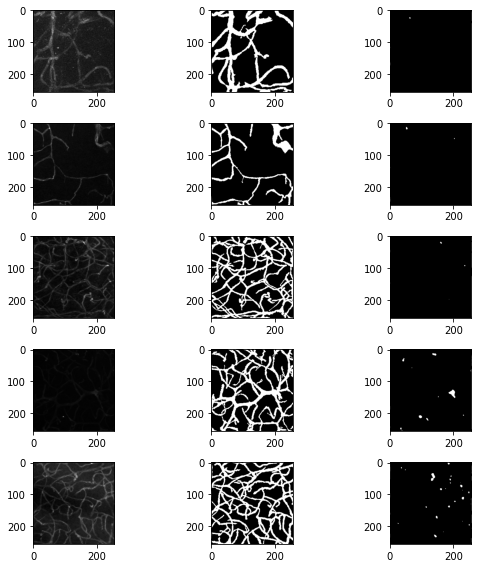

In [19]:
fig, axs = plt.subplots(5, 3, figsize=(8,8))
for i, idx in zip(range(5), lowest_acc):
    img, target = ds_valid[idx]
    with torch.no_grad():
        scores = model(img.unsqueeze(0))#['out']
    pred = torch.argmax(scores, dim=1)[0]
    axs[i,0].imshow(img[0], 'gray')
    axs[i,1].imshow(target, 'gray')
    axs[i,2].imshow(pred, 'gray')
plt.tight_layout()

In [20]:
highest_acc

[27, 15, 1, 43, 85]

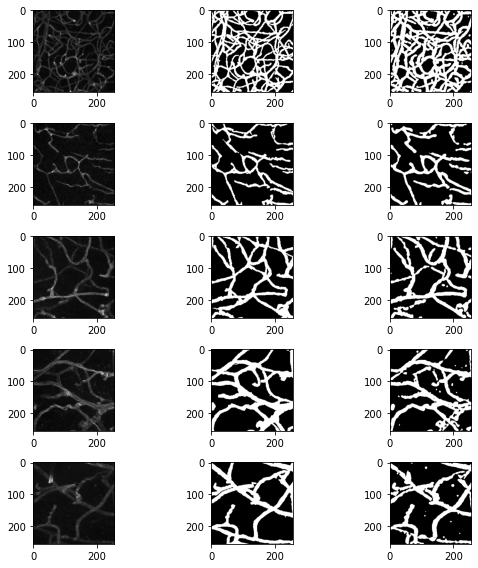

In [21]:
fig, axs = plt.subplots(5, 3, figsize=(8,8))
for i, idx in zip(range(5), highest_acc):
    img, target = ds_valid[idx]
    with torch.no_grad():
        scores = model(img.unsqueeze(0))#['out']
    pred = torch.argmax(scores, dim=1)[0]
    axs[i,0].imshow(img[0], 'gray')
    axs[i,1].imshow(target, 'gray')
    axs[i,2].imshow(pred, 'gray')
plt.tight_layout()